In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [28]:
df = pd.read_csv('tested.csv',usecols=['Age','Fare','Survived'])

In [29]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [30]:
df['Age'].isnull().sum()
df['Age'].mean()  

30.272590361445783

In [43]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [44]:
df

,Survived,Age,Fare
0,0,34.50000,7.8292
1,1,47.00000,7.0000
2,0,62.00000,9.6875
3,0,27.00000,8.6625
4,1,22.00000,12.2875
...,...,...,...
413,0,30.27259,8.0500
414,1,39.00000,108.9000
415,0,38.50000,7.2500
416,0,30.27259,8.0500


In [45]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

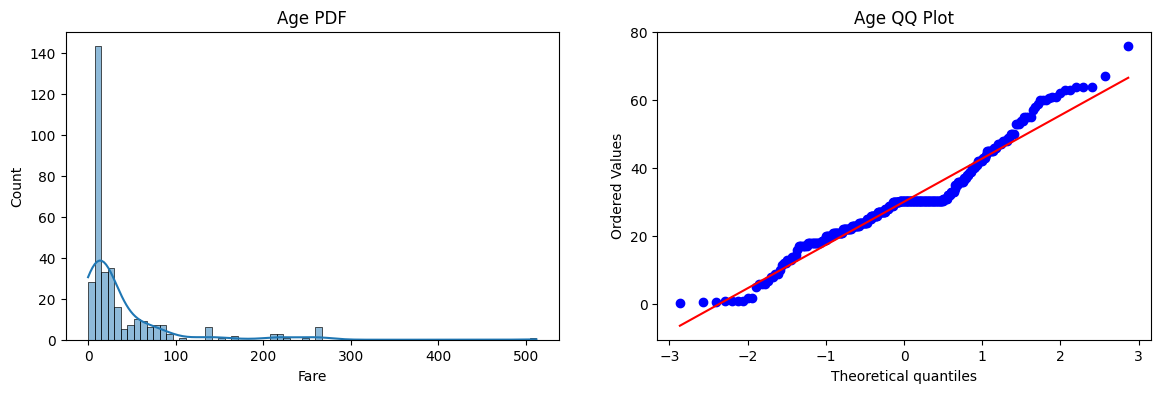

In [47]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'],kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm', plot=plt)
plt.title('Age QQ Plot')
plt.show()




In [48]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [50]:
clf.fit(X_train,y_train)

LogisticRegression()

In [49]:

clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy DC", accuracy_score(y_test,y_pred1))

Accuracy LR 0.6071428571428571
Accuracy DC 0.5238095238095238


In [52]:
trf = FunctionTransformer(func = np.log1p)

In [53]:
X_train_transformed = trf.fit_transform(X_train)

X_test_transformed = trf.transform(X_test)


In [54]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)




LogisticRegression()

In [56]:
clf2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [57]:
y_pred = clf.predict(X_test)
y_pred_1 = clf2.predict(X_test)



In [58]:
print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy DC", accuracy_score(y_test,y_pred1))

Accuracy LR 0.5714285714285714
Accuracy DC 0.5238095238095238


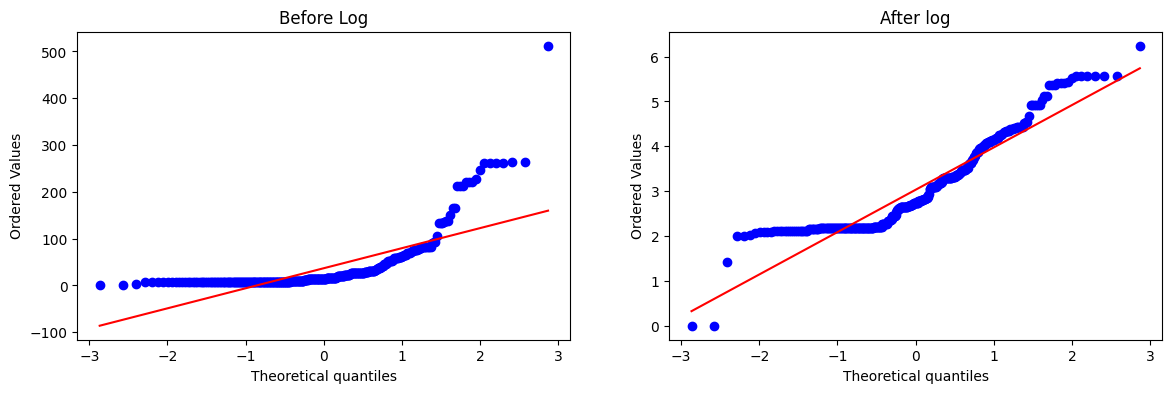

In [61]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm', plot=plt)
plt.title('Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm', plot=plt)
plt.title('After log')
plt.show()

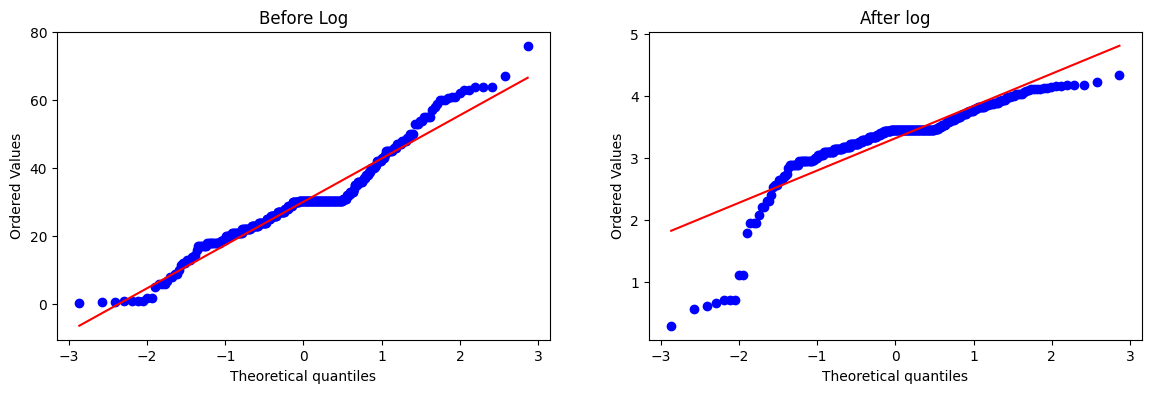

In [62]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm', plot=plt)
plt.title('Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist='norm', plot=plt)
plt.title('After log')
plt.show()